In [ ]:
import numpy as np
import pandas as pd

data=pd.read_csv("/content/loan.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


 Data Cleaning

In [ ]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(39717, 111)

In [ ]:
(data.isnull().mean()*100).round(2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [ ]:
### drop columns which are have 100% missing values
temp= data.dropna(axis=1,how='all')

In [ ]:
temp.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:
(temp.isnull().mean()*100).round(2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [ ]:
find_miss_col= temp.columns[(temp.isnull().mean()*100).round(2)>90]
temp.drop(find_miss_col,axis=1,inplace=True)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
(temp.isnull().mean()*100).round(2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [ ]:
temp.shape

(39717, 55)

In [ ]:
temp.drop('desc',axis=1,inplace=True)


In [ ]:
temp.shape

(39717, 54)

In [ ]:
final_data=temp
final_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:
### Format the values wherever required
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [ ]:
#Remove % in term column and convert into integers
final_data["term"]=final_data["term"].apply(lambda x : x.replace(" months","")).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
final_data["term"]

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int64

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  int64  
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [ ]:
final_data["int_rate"]= final_data["int_rate"].apply(lambda x: str(x).rstrip("%")).astype(float)
final_data["int_rate"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [ ]:
final_data=final_data[~final_data["emp_length"].isnull()]
final_data=final_data[~final_data["revol_util"].isnull()]
final_data['home_ownership'] = final_data["home_ownership"].str.replace('NONE','RENT')


In [ ]:
final_data.shape

(38595, 54)

In [ ]:
### Here there are still some variables that are not required as the variables are useful Text classification techniques, not useful for predicting defaulters. 
not_req=["id",
   "delinq_2yrs",
   "funded_amnt",
   "emp_title", 
   "pymnt_plan",
   "url",  
   "title", 
   "zip_code",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

final_data = final_data.drop(not_req, axis=1)


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38595 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   38595 non-null  int64  
 1   loan_amnt                   38595 non-null  int64  
 2   funded_amnt_inv             38595 non-null  float64
 3   term                        38595 non-null  int64  
 4   int_rate                    38595 non-null  float64
 5   installment                 38595 non-null  float64
 6   grade                       38595 non-null  object 
 7   sub_grade                   38595 non-null  object 
 8   emp_length                  38595 non-null  object 
 9   home_ownership              38595 non-null  object 
 10  annual_inc                  38595 non-null  float64
 11  verification_status         38595 non-null  object 
 12  issue_d                     38595 non-null  object 
 13  loan_status                 385

In [ ]:

### Remove operators and years string in loan_status variable and convert into integer
def extract_values_emp_length(x):

  if "+" in x:
    return str(x).replace("+ years","")

  elif ("<" in x):
    
    return 0
  else:
    return x.replace(" years","")


  


In [ ]:
final_data["emp_length"]= final_data["emp_length"].apply(extract_values_emp_length)

In [ ]:
final_data["emp_length"]

0            10
1             0
2            10
3            10
4        1 year
          ...  
39712         4
39713         3
39714         0
39715         0
39716         0
Name: emp_length, Length: 38595, dtype: object

In [ ]:
final_data["emp_length"]=final_data["emp_length"].apply(lambda x: x.strip(" year") if " year" in str(x) else x)

In [ ]:
final_data["emp_length"]=final_data["emp_length"].astype('int')

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38595 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   38595 non-null  int64  
 1   loan_amnt                   38595 non-null  int64  
 2   funded_amnt_inv             38595 non-null  float64
 3   term                        38595 non-null  int64  
 4   int_rate                    38595 non-null  float64
 5   installment                 38595 non-null  float64
 6   grade                       38595 non-null  object 
 7   sub_grade                   38595 non-null  object 
 8   emp_length                  38595 non-null  int64  
 9   home_ownership              38595 non-null  object 
 10  annual_inc                  38595 non-null  float64
 11  verification_status         38595 non-null  object 
 12  issue_d                     38595 non-null  object 
 13  loan_status                 385

In [ ]:
### Here people who are under current category is not much useful as it donot predict anything
final_data = final_data[final_data['loan_status'] != 'Current']

In [ ]:
final_data.shape

(37497, 28)

In [ ]:
final_data["revol_util"]=final_data["revol_util"].apply(lambda x: x.replace("%",""))
final_data["revol_util"]=final_data["revol_util"].astype(float)
final_data["revol_util"]=final_data["revol_util"].apply(lambda x: x/100)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
final_data['loan_status'] = final_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:

import datetime
final_data['issue_d'] = final_data['issue_d'].apply(lambda x: datetime.datetime.strptime(x, '%b-%y'))
final_data['issue_d'] = final_data['issue_d'].apply(lambda x: x.year)


*******************Data Analysis****************

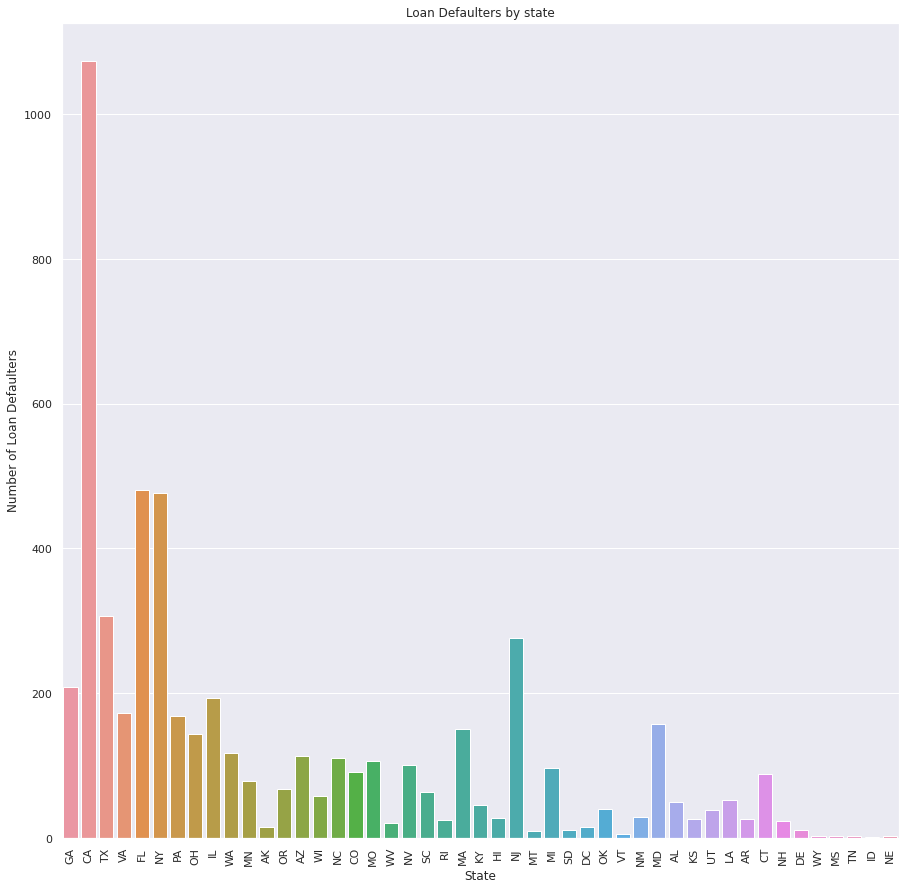

In [ ]:

### we can see that Defaulters are more in CA state

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[15, 15])
sns.countplot(x='addr_state', data=final_data[final_data['loan_status']==1])
plt.title('Loan Defaulters by state')
plt.xlabel("State")
plt.xticks(rotation=90)
plt.ylabel("Number of Loan Defaulters")
plt.show()







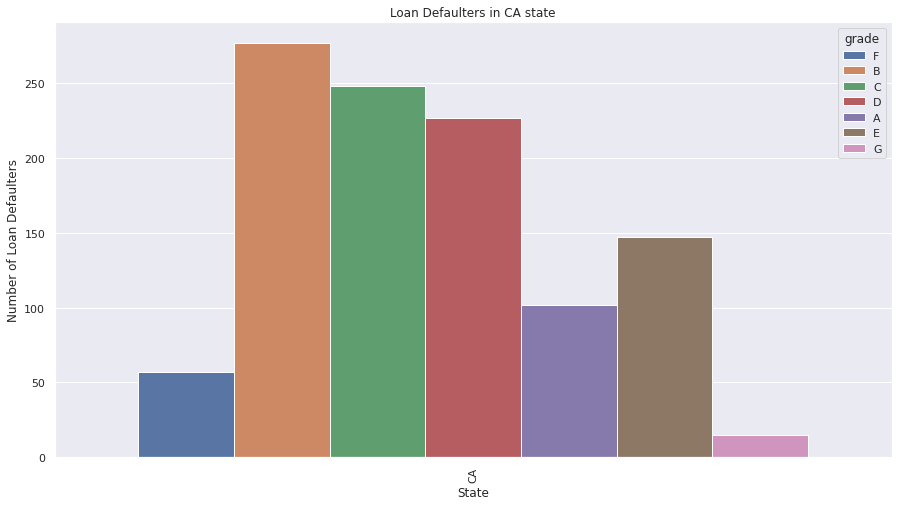

In [ ]:

### From the below graph we can infer that defaulters are more in Grade "B","C" in CA state. Grades "F" and "G" are having less defaulter
plt.figure(figsize=[15, 8])
chargedoff=final_data[final_data['loan_status']==1]
sns.countplot(x='addr_state', hue="grade",data=chargedoff[chargedoff["addr_state"]=="CA"])
plt.title('Loan Defaulters in CA state')
plt.xlabel("State")
plt.xticks(rotation=90)
plt.ylabel("Number of Loan Defaulters")
plt.show()



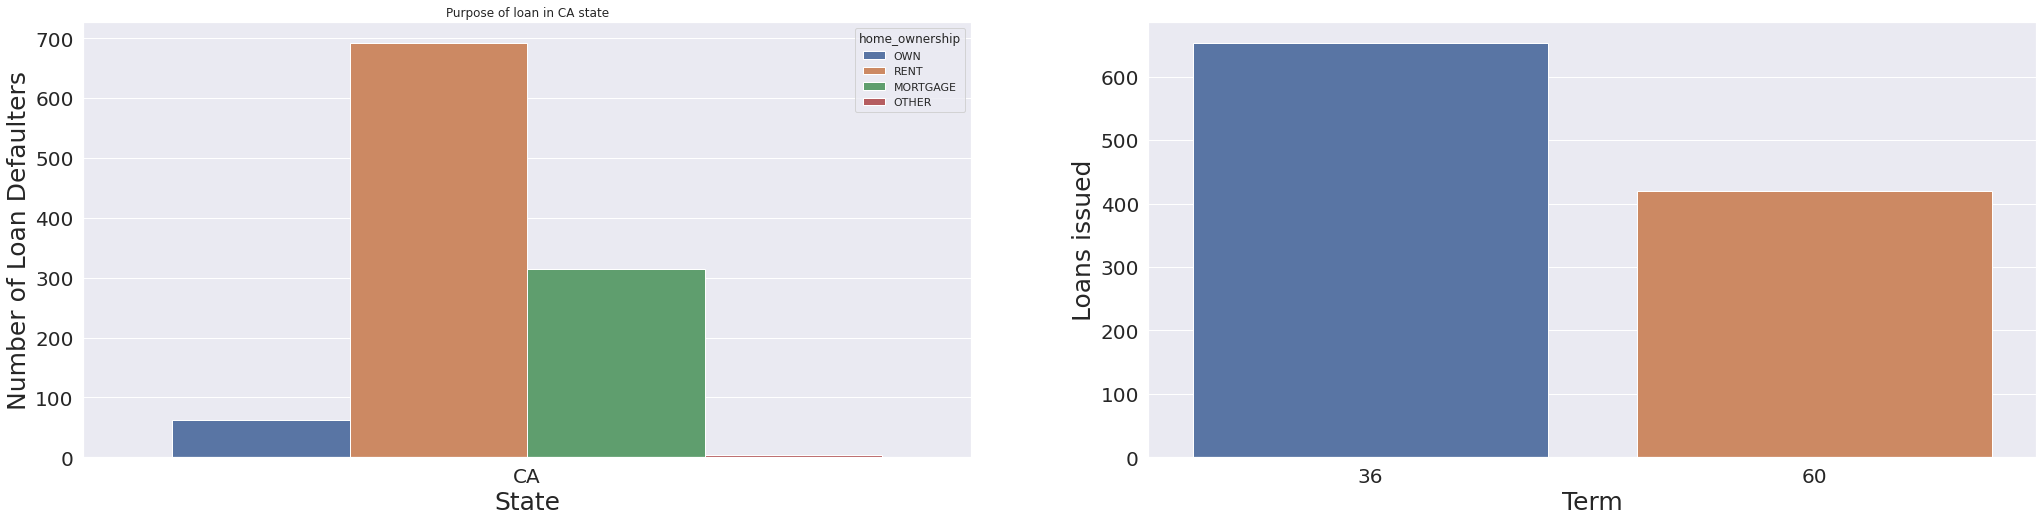

In [ ]:
plt.subplot(1,2,1)
#plt.figure(figsize=[15, 5])
chargedoff=final_data[final_data['loan_status']==1]
sns.countplot(x='addr_state', hue="home_ownership",data=chargedoff[chargedoff["addr_state"]=="CA"])
plt.title('Purpose of loan in CA state')
plt.xlabel("State", fontsize=25)
plt.xticks(rotation=0,fontsize=20)
plt.ylabel("Number of Loan Defaulters", fontsize=25)
plt.yticks(rotation=0,fontsize=20)

plt.subplot(1,2,2)
sns.countplot(x='term', data=chargedoff[chargedoff["addr_state"]=="CA"])
plt.xlabel("Term", fontsize=25)
plt.ylabel("Loans issued", fontsize=25)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

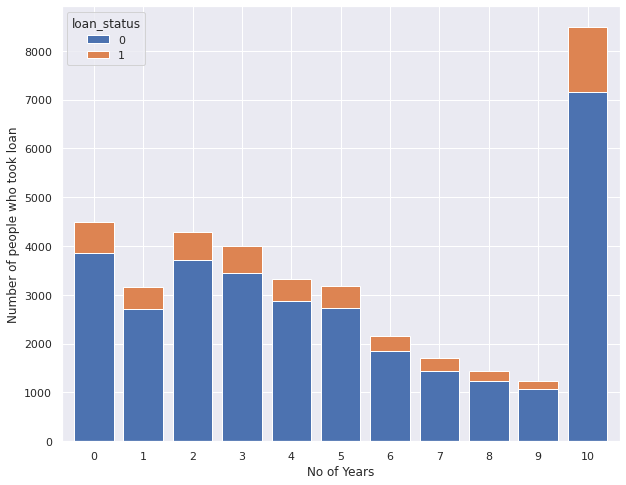

In [ ]:
#We can see that number of defaulters decreasing as experice is increasing. And sudden increase from people who are having 10+ experience.
cat_loanstatus = final_data[['emp_length', 'loan_status']]
cat_loanstatus = cat_loanstatus.groupby(['emp_length', 'loan_status'])
ax=cat_loanstatus.size().unstack().plot(kind='bar', stacked=True, figsize=(10, 8),width=0.8)
plt.xlabel("No of Years")
plt.ylabel("Number of people who took loan")
plt.xticks(rotation=0)




In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37497 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   37497 non-null  int64  
 1   loan_amnt                   37497 non-null  int64  
 2   funded_amnt_inv             37497 non-null  float64
 3   term                        37497 non-null  int64  
 4   int_rate                    37497 non-null  float64
 5   installment                 37497 non-null  float64
 6   grade                       37497 non-null  object 
 7   sub_grade                   37497 non-null  object 
 8   emp_length                  37497 non-null  int64  
 9   home_ownership              37497 non-null  object 
 10  annual_inc                  37497 non-null  float64
 11  verification_status         37497 non-null  object 
 12  issue_d                     37497 non-null  int64  
 13  loan_status                 374

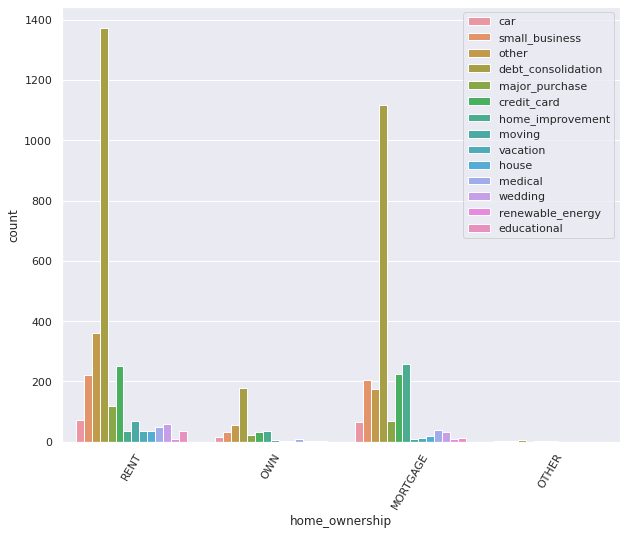

In [ ]:
# we can see here that in each home_onwership small business groups are defaulters.
plt.figure(figsize=[10, 8])
plot=sns.countplot(x='home_ownership', data=final_data[final_data['loan_status']==1],hue="purpose")
plt.xticks(rotation=60)
plt.legend(loc='upper right')
plt.show()


Text(0.5, 0, 'DTI')

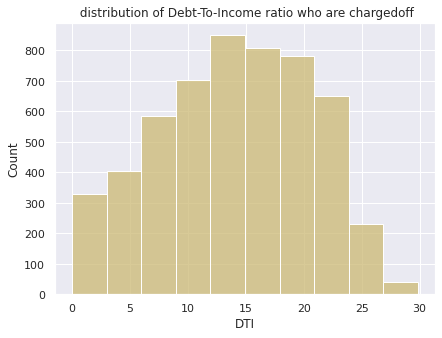

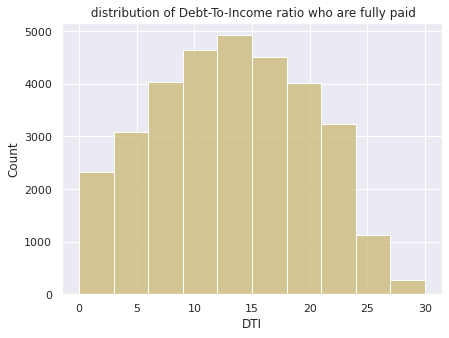

In [ ]:

plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)

sns.histplot(final_data[final_data["loan_status"]==1]["dti"], color='y', bins=10)

plt.title(' distribution of Debt-To-Income ratio who are chargedoff')
plt.xlabel('DTI')
plt.figure(figsize=[15, 5])
plt.subplot(1,2,2)

sns.histplot(final_data[final_data["loan_status"]==0]["dti"], color='y', bins=10)

plt.title(' distribution of Debt-To-Income ratio who are fully paid')
plt.xlabel('DTI')
# Most of the people who have DTI in between 10 to 15 are taking loans

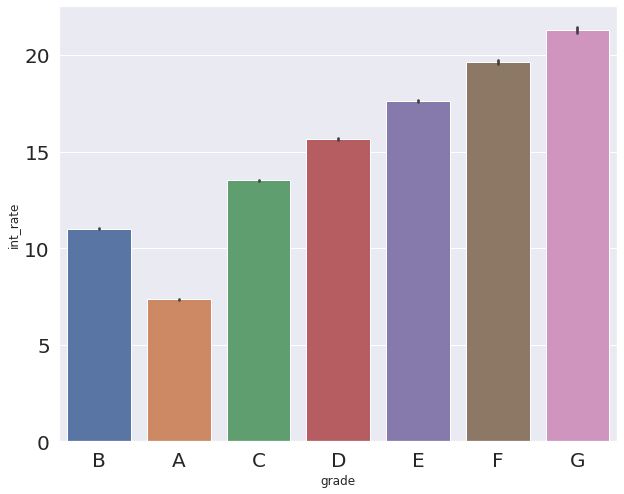

In [ ]:
# from the below graph we can conclude that people with lowest grade have high interest rates.
sns.barplot(x='grade',y='int_rate', data=final_data, order=final_data['grade'].value_counts().index)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.show();


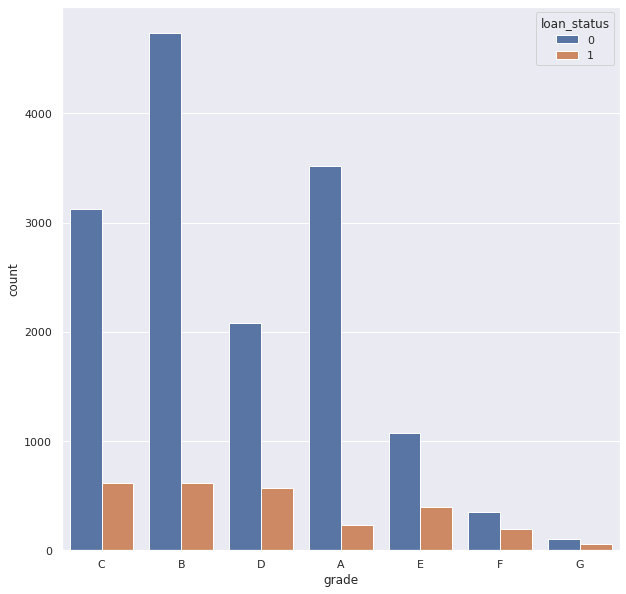

In [ ]:
plt.figure(figsize=[10, 10])
sns.countplot(x='grade', hue="loan_status" ,data=final_data[final_data['purpose']=="debt_consolidation" ])

Text(0.5, 1.0, 'Distribution of Loan status by Verification Status')

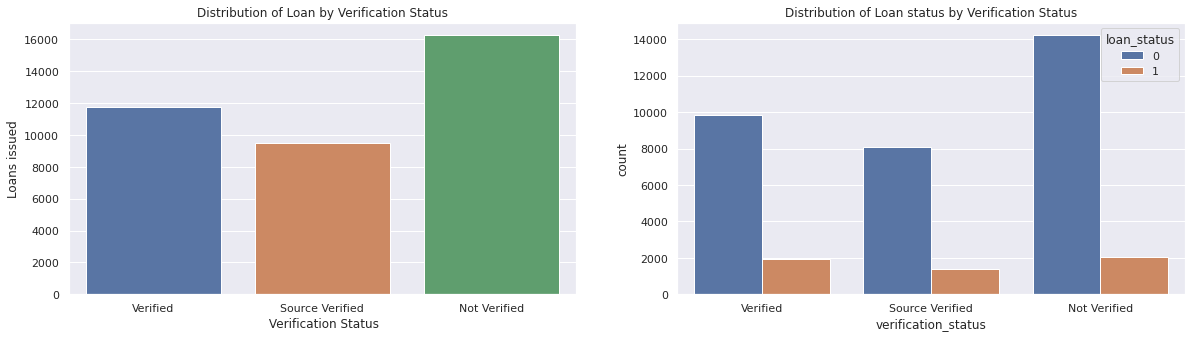

In [ ]:
plt.figure(figsize=(20,5))
#Number of loans is very high for the people who are not been verified.
plt.subplot(1,2,1)
sns.countplot(x='verification_status', data=final_data)
plt.title('Distribution of Loan by Verification Status')
plt.xlabel(" Verification Status")
plt.ylabel("Loans issued")

# Here Defaulters are more whose verification is done .
plt.subplot(1,2,2)
sns.countplot(x=final_data["verification_status"], hue="loan_status", data=final_data)
plt.title('Distribution of Loan status by Verification Status')

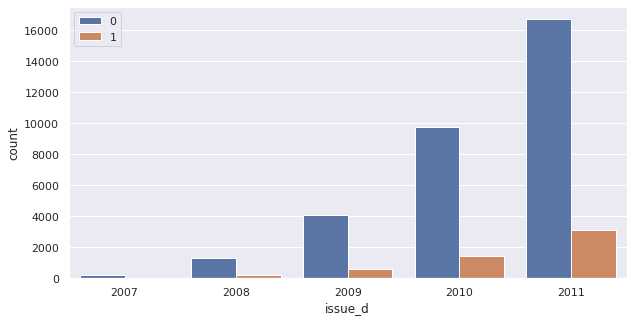

In [ ]:
plt.figure(figsize=[10, 5])
sns.countplot(x='issue_d', hue='loan_status', data=final_data)
plt.legend(loc='upper left')
plt.show()
#From the below graph , we can conclude that loan sanctions are getting increased year by year

In [ ]:
final_data.groupby(['issue_d',"loan_status"])["member_id"].count()

member_id  loan_amnt  funded_amnt_inv   term  int_rate  \
issue_d loan_status                                                           
2007    0                  206        206              206    206       206   
        1                   45         45               45     45        45   
2008    0                 1311       1311             1311   1311      1311   
        1                  243        243              243    243       243   
2009    0                 4111       4111             4111   4111      4111   
        1                  591        591              591    591       591   
2010    0                 9790       9790             9790   9790      9790   
        1                 1406       1406             1406   1406      1406   
2011    0                16695      16695            16695  16695     16695   
        1                 3099       3099             3099   3099      3099   

                     installment  grade  sub_grade  emp_length  \
issue_d loan_status                                              
2007    0                    206    206        206         206   
        1                     45     45         45          45   
2008    0                   1311   1311       1311        1311   
        1                    243    243        243         243   
2009    0                   4111   4111       4111        4111   
        1                    591    591        591         591   
2010    0                   9790   9790       9790        9790   
        1                   1406   1406       1406        1406   
2011    0                  16695  16695      16695       16695   
        1                   3099   3099       3099        3099   

                     home_ownership  ...  revol_bal  revol_util  \
issue_d loan_status                  ...                          
2007    0                       206  ...        206         206   
        1                        45  ...         45          45   
2008    0                      1311  ...       1311        1311   
        1                       243  ...        243         243   
2009    0                      4111  ...       4111        4111   
        1                       591  ...        591         591   
2010    0                      9790  ...       9790        9790   
        1                      1406  ...       1406        1406   
2011    0                     16695  ...      16695       16695   
        1                      3099  ...       3099        3099   

                     initial_list_status  collections_12_mths_ex_med  \
issue_d loan_status                                                    
2007    0                            206                         156   
        1                             45                          39   
2008    0                           1311                        1311   
        1                            243                         243   
2009    0                           4111                        4111   
        1                            591                         591   
2010    0                           9790                        9790   
        1                           1406                        1406   
2011    0                          16695                       16695   
        1                           3099                        3099   

                     policy_code  acc_now_delinq  chargeoff_within_12_mths  \
issue_d loan_status                                                          
2007    0                    206             206                       156   
        1                     45              45                        39   
2008    0                   1311            1311                      1311   
        1                    243             243                       243   
2009    0                   4111            4111                      4111   
        1                    591             591               